In [6]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi']

# Pandas

Pandas is Python's answer to R.  It's a good tool for small(ish) data analysis -- i.e., when everything fits into memory.

The basic new "noun" in pandas is the **data frame**.

## Noun: 

### Data frames

Like a table, with rows and columns (e.g., as in SQL).  Except:
  - The rows can be indexed by something interesting (there is special support for labels like categorical and timeseries data).  This is especially useful when you have timeseries data with potentially missing data points.
  - Cells can store Python objects. Like in SQL, columns are type homogeneous.
  - Instead of "NULL", the name for a non-existent value is "NA".  Unlike R, Python's data frames only support NAs in columns of some data types (basically: floating point numbers and 'objects') -- but this is mostly a non-issue (because it will "up-cast" integers to float64, etc.)
  
### Data Series:
These are named columns of a DataFrame (more correctly, a dataframe is a dictionary of Series).  The entires of the series are have homogenous type.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# a data frame
df1 = pd.DataFrame({
    'number': [1, 2, 3],
    'animal': ['cat', 'dog', 'mouse']
})

# the same data frame
df2 = pd.DataFrame([
    ('cat', 1),
    ('dog', 2),
    ('mouse', 3),
], columns=['animal', 'number'])

assert((df1 == df2).all().all())

# a series
print df1['animal']

0      cat
1      dog
2    mouse
Name: animal, dtype: object


## Verbs: Operations
  
Pandas provides a "batteries-included" basic data analysis:
  - **Loading data:** `read_csv`, `read_table`, `read_sql`, and `read_html`
  - **Selection, filtering, and aggregation** (i.e., SQL-type operations): There's a special syntax for `SELECT`ing.  There's the `merge` method for `JOIN`ing.  There's also an easy syntax for what in SQL is a mouthful: Creating a new column whose value is computed from other column -- with the bonus that now the computations can use the full power of Python (though it might be faster if it didn't).
  - **"Pivot table" style aggregation**: If you're an Excel cognosceti, you may appreciate this.
  - **NA handling**: Like R's data frames, there is good support for transforming NA values with default values / averaging tricks / etc.
  - **Basic statistics:** e.g. `mean`, `median`, `max`, `min`, and the convenient `describe`.
  - **Plugging into more advanced analytics:** Okay, this isn't batteries included.  But still, it plays reasonably with `sklearn`.
  - **Visualization:** For instance `plot` and `hist`.
  
We'll go through a little on all of these in the context of an example.  To go through it, you must have the (output) data files from the HMDA "Project structure" example.  We're going to explore a dataset of mortgage insurance issued by the Federal Housing Authority (FHA).  The data is broken down by census tract and tells us how big of a player the FHA is in each tract (how many homes etc ...).

##Loading data (and basic statistics / visualization)


In [17]:
names =["State_Code", "County_Code", "Census_Tract_Number", "NUM_ALL", "NUM_FHA", "PCT_NUM_FHA", "AMT_ALL", "AMT_FHA", "PCT_AMT_FHA"]
df = pd.read_csv('C:/Users/NAULIA/Desktop/data incubator/day2/fha_by_tract.csv', names=names)  ## Loading a CSV file, without a header (so we have to provide field names)

df['GEOID'] = df['Census_Tract_Number']*100 + 10**6 * df['County_Code'] \
    + 10**9 * df['State_Code']   ## A computed field!
    
df = df.sort('State_Code')  # sorting data to make it easier to read
df.head()

C:\Python27\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID
23999,1,49,9613,16,4,25.0000,2184,799,36.58420,1049961300
55215,1,3,102,8,1,12.5000,774,76,9.81912,1003010200
65492,1,27,NaN,1,0,0.0000,82,0,0.00000,NaN
45193,1,95,311,20,3,15.0000,1495,263,17.59200,1095031100
33750,1,39,9618,14,3,21.4286,1243,333,26.79000,1039961800


Basic statistics and a histogram of the percentage of mortages
in each census tract insured by FHA
            PCT_AMT_FHA
State_Code             
1             28.686248
2             26.921463
4             34.058197
5             21.682422
6             32.917623
8             27.568757
9             34.184050
10            32.157928
11            28.359463
12            32.744027
13            32.304661
15             7.530118
16            23.080568
17            30.644644
18            30.971421
19            18.767196
20            24.646292
21            21.686193
22            26.763788
23            18.374351
24            36.909521
25            21.119813
26            33.799816
27            25.908308
28            23.901013
29            25.132977
30            17.363563
31            25.771856
32            38.552593
33            25.491643
34            35.520683
35            33.116524
36            31.123738
37            19.035407
38            22.904362
39           

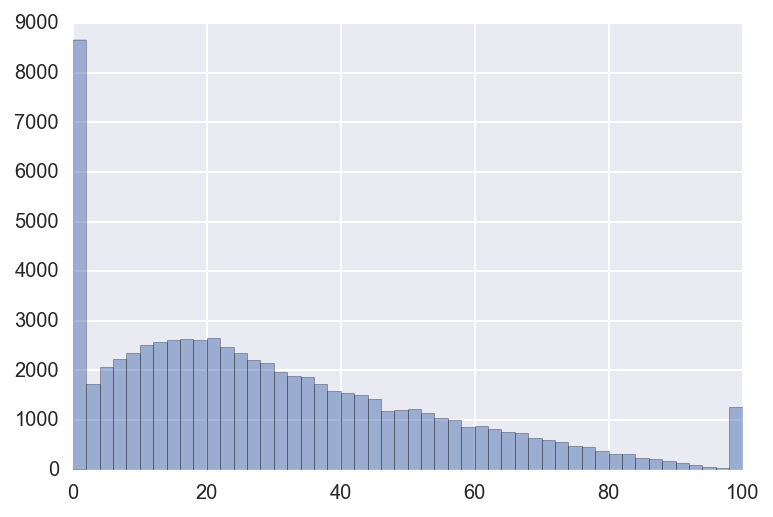

In [18]:
print "Basic statistics and a histogram of the percentage of mortages"
print "in each census tract insured by FHA"
print df[['State_Code','PCT_AMT_FHA']].groupby('State_Code').mean()
df['PCT_AMT_FHA'].hist(bins=50, alpha=0.5)

The above distribution looks a little skewed, let's look at it's log
We can save off the data into a new column
count    72035.000000
mean         8.169060
std          1.431749
min          0.693147
25%          7.346655
50%          8.335192
75%          9.176577
max         14.270319
Name: LOG_AMT_ALL, dtype: float64
We can use the apply function to transform data


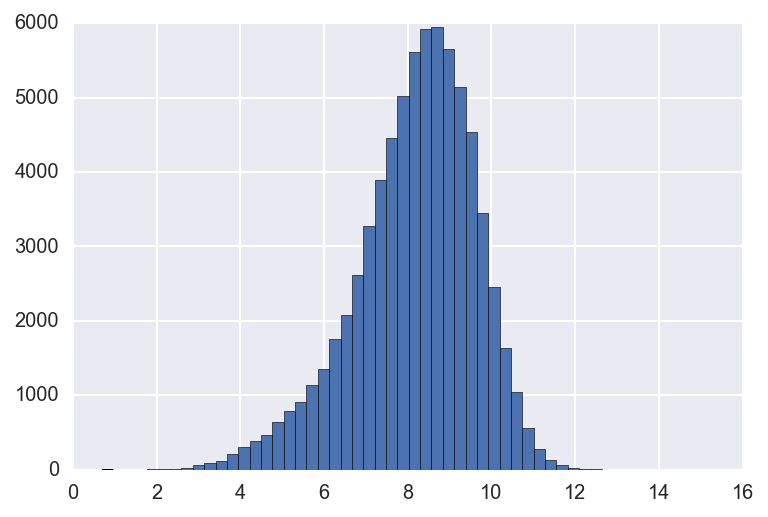

In [19]:
print "The above distribution looks a little skewed, let's look at it's log"
print "We can save off the data into a new column"
df['LOG_AMT_ALL'] = np.log(df['AMT_ALL'])
print df['LOG_AMT_ALL'].describe()

print "We can use the apply function to transform data"
df['AMT_ALL'].apply(np.log).hist(bins=50)

##Selecting

In [ ]:
print "Selecting off a column"
print df['State_Code'].head()
print
print "Selecting off multiple columns"
print df[['State_Code', 'County_Code']].head()
print
print "programatically access column names"
print all([col for col in df] == df.columns)

##Filtering

Now the `df[...]` notation is very flexible:
  - It accepts column names (strings and lists of strings);
  - It accepts column numbers (so long as there is no ambiguity with column names..);
  - It accepsts _binary data series!_
  
This means that you can write

        df[ df['column_name2']==MD & ( df['column_name1']==5 | df['column_name1']==6 ) ]
   
for what you would write in SQL as

>         SELECT * FROM df WHERE
            column_name2='MD" AND (column_name1=5 OR column_name1=6)

In [20]:
print "Selection returns a boolean array .."
print (df['State_Code'] == 1).head()
print
print "... we can apply the usual boolean operators to it"
print ((df['State_Code'] == 1) & (df['Census_Tract_Number'] == 9613)).head()
print
print "pandas indices take boolean lists of the appropriate length"
print df[df['State_Code'] == 5].head()
print
print "p.s. - numpy indices also take boolean arguments: here are some odd numbers"
print np.arange(10)[np.arange(10) % 2 == 1]
print

Selection returns a boolean array ..
23999    True
55215    True
65492    True
45193    True
33750    True
Name: State_Code, dtype: bool

... we can apply the usual boolean operators to it
23999     True
55215    False
65492    False
45193    False
33750    False
dtype: bool

pandas indices take boolean lists of the appropriate length
       State_Code  County_Code  Census_Tract_Number  NUM_ALL  NUM_FHA  \
27766           5           25                 9702       14        4   
45189           5           43                 4901        5        1   
45118           5            3                 9606       18        3   
71803           5           21                 9506       11        0   
66550           5           35                  311        3        0   

       PCT_NUM_FHA  AMT_ALL  AMT_FHA  PCT_AMT_FHA       GEOID  LOG_AMT_ALL  
27766      28.5714     1645      535      32.5228  5025970200     7.405496  
45189      20.0000      449       79      17.5947  5043490100     6.10

**Exercise**: 
1. Plot the histogram of percentages for different states in the same graph to compare them.
2. notice that there is a spike at 100%.  This means that the FHA has ensured 100% of the houses in that census tract.  See what happens to the histogram whem we restrct on the number of total loans is non-negligible.

##Join-ing

The analogue of a

>             
    SELECT * 
        FROM df1
        INNER JOIN df2 
        ON df1.field_name=df2.field_name;

is

    df_joined = df1.merge(df2, on='field_name')

You can also do left / right / outer joins, mix-and-match column names, etc.  For that consult the Pandas documentation. (The example below will do a left join..)

Of course, just looking at the distribution of insurance by census tract isn't interesting unless we know more about the census tract.

In [23]:
# Loading information about census tracts
df_geo = pd.read_csv('C:/Users/NAULIA/Desktop/data incubator/Pandas/2013_Gaz_tracts_national.tsv', sep='\t')

print "joining two dataframes"
df_joined = df.merge(df_geo, on='GEOID', how='left')
df_joined.sort('AMT_ALL', ascending=False).head()

joining two dataframes


C:\Python27\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,State_Code,County_Code,Census_Tract_Number,NUM_ALL,NUM_FHA,PCT_NUM_FHA,AMT_ALL,AMT_FHA,PCT_AMT_FHA,GEOID,LOG_AMT_ALL,USPS,ALAND,AWATER,ALAND_SQMI,AWATER_SQMI,INTPTLAT,INTPTLONG
72034,NaN,NaN,NaN,9477,1932,20.38620,1575871,331515,21.036900,NaN,14.270319,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64830,48,157,6731.01,2329,363,15.58610,578838,76312,13.183700,48157673101,13.268778,TX,50922560,384718,19.661,0.149,29.744280,-95.815507
7795,6,73,170.30,574,58,10.10450,284965,31840,11.173300,6073017030,12.560122,CA,33370884,1297044,12.885,0.501,33.036238,-117.126757
8857,6,75,615.00,357,4,1.12045,271648,2165,0.796987,6075061500,12.512262,CA,1669698,439050,0.645,0.170,37.787726,-122.392389
8890,6,59,626.43,130,2,1.53846,223532,1484,0.663887,6059062643,12.317310,CA,18821408,1549909,7.267,0.598,33.595088,-117.829038


## Aggregation

The analog of SQL's `GROUP BY` is

    grouped = df.groupby(['field_name1', ...])...

The above is analogous to
>             
    SELECT mean(df.value1), std(df.value2) 
        FROM df
        GROUP BY df.field_name1, ...

Pandas is somewhat more flexible in how you can use grouping, not requiring you to specify an aggregation function up front.  A few examples are:


In [ ]:
# This isn't a SQL-style 'GROUP BY'.
df_joined.groupby('USPS').first().head()

In [ ]:
# This is the analog of
# SELECT USPS, SUM(AMT_FHA), SUM(AMT_ALL), ... FROM df GROUP BY USPS;
df_by_state = df_joined.groupby('USPS')['AMT_FHA', 'AMT_ALL', 'NUM_FHA', 'NUM_ALL'].sum()

df_by_state['PCT_AMT_FHA'] = 100.0 * df_by_state['AMT_FHA']  / df_by_state['AMT_ALL']
df_by_state['PCT_NUM_FHA'] = 100.0 * df_by_state['NUM_FHA']  / df_by_state['NUM_ALL']

# This sure looks different than the census-tract level histogram!
df_by_state['PCT_AMT_FHA'].hist(bins=20)

## NA handling


When you read in a CSV file / SQL data base there are often "NA" (or "null", "None", etc.) values.  The CSV reader has a special field for specifying how this is denoted, and SQL has the built-in notion of NULL.  Pandas provides some tools for working with these -- they are generally similar too (and a little bit worse than) `R`

- `isnull` / `notnull`: Testing for null-ness e.g., 
>       
        df['column_name'].isnull()
        
   returns a Boolean series
- `fillna`: Replacing null values by something else, e.g.,
>         
        df['column_name'].fillna(0)             # Fills constant value, here 0
        df['column_name'].fillna(method='ffill')  # Fill forwards
        df['column_name'].fillna(method='bfill', limit=5)  # Fill backwards, at most 5
        
    At least by default, this is *not in place* -- that is, it creates a new series and does not change the original one.

- `interpolate`: Replacing null values by (linear, or quadratic, or...) interpolation.  There is support for indexing by times (not necessarily equally spaced), etc. in the documentation.  The most basic usage is
>        
        df['column_name'].interpolate()
    
    As above, this is not in place.


For more details: http://pandas.pydata.org/pandas-docs/stable/missing_data.html

Pandas HTML data import example
================================
Pandas takes a "batteries included approach" and throws in a whole lot of convenience functions.  For instance it has import functions for a variety of formats.  One of the pleasant surprises is a command `read_html` that's meant to automate the process of extacting tabular data from HTML.  In particular, it works pretty well with tables on Wikipedia.  

Let's do an example: We'll try to extract the list of the world's tallest buildings from
http://en.wikipedia.org/wiki/List_of_tallest_buildings_and_structures_in_the_world


(This example will, likely, not get lecture time.)

In [3]:
import pandas as pd
dfs = pd.read_html('http://en.wikipedia.org/wiki/List_of_tallest_buildings_and_structures_in_the_world', header=0, parse_dates=False)

# There are several tables on the page.  By inspection we can figure out which one we want
tallest = dfs[2]  

# The coordinates column needs to be fixed up.  This is a bit of string parsing:
def clean_lat_long(s):
    try:
        parts = s.split("/")
    except AttributeError:
        return (None, None)
    if len(parts)<3:
        return None
    m=re.search(r"(\d+[.]\d+);[^\d]*(\d+[.]\d+)[^\d]", parts[2])
    if not m:
        return (None, None)
    return (m.group(1), m.group(2))

tallest['Clean_Coordinates'] = tallest['Coordinates'].apply(clean_lat_long)
tallest['Latitude'] = tallest['Clean_Coordinates'].apply(lambda x:x[0])
tallest['Longitude'] = tallest['Clean_Coordinates'].apply(lambda x:x[1])

# Et voila
tallest.head()

ImportError: lxml not found, please install it

Remarks:
-----------
Unfortunately, that didn't work well on height (ft) and is so-so on year built.  

In both cases, it is because it is assuming that the field is a _date_ rather than just a number.  We can hint these things to `read_html` through extra parameters.

In this particular case we would probably not bother: It is pretty good on the year built, and height in meters is good enough.

**Exercise**: 

1. Parse the height correctly.
1. Parse the table rankings of [UK universities available on wikipedia](https://en.wikipedia.org/wiki/Rankings_of_universities_in_the_United_Kingdom):

## "Pivot table" syntax, Stacking and unstacking

These are useful tools -- and if you're aready familiar with Pivot Tables in e.g., Excel they'll be familiar.  Otherwise, this might be best saved for a hypothetical second lesson: see http://pandas.pydata.org/pandas-docs/stable/reshaping.html


In [ ]:
df.head()

df

Plugging into more advanced analytics
-------
Almost any "advanced analytics" tool in the Python ecosystem is going to take as input `np.array` type arrays.  You can access the underlying array of a data frame column as

        df['column'].values
        
Many of them take `nd.array` whose underlying data can be accessed by 

        df.values
        
directly.  *Most* of the time, they will take `df['column']` and `df` without needing to look at values.

This is particularly important if you want to use Pandas with the sklearn library. See this [blog post](http://www.markhneedham.com/blog/2013/11/09/python-making-scikit-learn-and-pandas-play-nice/) for an example.

*Copyright &copy; 2015 The Data Incubator.  All rights reserved.*